<a href="https://colab.research.google.com/github/ShinyQ/CNN_Rock-Paper-Scissor-Classification/blob/main/Rock_Paper_Scissor_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rock, Paper Scissor Image Classification**

Nama : Kurniadi Ahmad Wijaya <br>
Email : kurniadiwijaya@student.telkomuniversity.ac.id

### **Project Description**

- Dataset harus dibagi menjadi train set dan validation set.
- Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
- Harus mengimplementasikan augmentasi gambar.
- Menggunakan image data generator.
- Model harus menggunakan model sequential.
- Pelatihan model tidak melebihi waktu 30 menit.
- Program dikerjakan pada Google Colaboratory.
- Akurasi dari model minimal 85%.

### **Import Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from google.colab import files

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import zipfile
import shutil
import os

In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


### **Import And Save Image Dataset**

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-08 09:48:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.56MB/s    in 53s     

2021-07-08 09:49:04 (5.82 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
base_dir = '/tmp/rockpaperscissors'

if os.path.exists(base_dir):
   !rm -fr /tmp/rockpaperscissors

zip_ref = zipfile.ZipFile('/tmp/rockpaperscissors.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Checking File List Directory
!tree -d /tmp/rockpaperscissors

/tmp/rockpaperscissors
├── paper
├── rock
├── rps-cv-images
│   ├── paper
│   ├── rock
│   └── scissors
└── scissors

7 directories


### **Seperate Train And Validation Data**

In [ ]:
# Fungsi untuk membuat direktori baru
def make_dir(base, dir):
    path = os.path.join(base, dir)
    os.mkdir(path)

    return path

In [ ]:
# Membuat Folder Dasar Untuk Train Dan Validation
train_dir = make_dir(base_dir, 'train')
val_dir = make_dir(base_dir, 'validation')

!tree -d /tmp/rockpaperscissors

/tmp/rockpaperscissors
├── paper
├── rock
├── rps-cv-images
│   ├── paper
│   ├── rock
│   └── scissors
├── scissors
├── train
└── validation

9 directories


In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

train_rock, test_rock = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper, test_paper = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors, test_scissors = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
print(f'Jumlah Data Train : {len(train_rock) + len(train_paper) + len(train_scissors)}')
print(f'Jumlah Data Test  : {len(test_rock) + len(test_paper) + len(test_scissors)}')

Jumlah Data Train : 1312
Jumlah Data Test  : 876


In [ ]:
# Membuat Direktori Masing-Masing Label Untuk Folder Data Train Dan Validation
train_rock_dir = make_dir(train_dir, 'rocks')
train_paper_dir =make_dir(train_dir, 'papers')
train_scissor_dir = make_dir(train_dir, 'scissors')

val_rock_dir = make_dir(val_dir, 'rocks')
val_paper_dir = make_dir(val_dir, 'papers')
val_scissor_dir = make_dir(val_dir, 'scissors')

In [ ]:
!tree -d /tmp/rockpaperscissors/train

/tmp/rockpaperscissors/train
├── papers
├── rocks
└── scissors

3 directories


In [ ]:
!tree -d /tmp/rockpaperscissors/validation

/tmp/rockpaperscissors/validation
├── papers
├── rocks
└── scissors

3 directories


In [ ]:
# Melakukan copy file image ke masing-masing direktori train dan validasi 
 
for i in train_rock:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock_dir, i))

for i in train_paper:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper_dir, i))

for i in train_scissors:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissor_dir, i))

for i in test_rock:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock_dir, i))

for i in test_paper:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper_dir, i))

for i in test_scissors:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissor_dir, i))

In [ ]:
# Hasil Akhir Proses Pembagian File Train Dan Validation
print(f'Jumlah Folder Train Rocks : {len(os.listdir(train_rock_dir))}')
print(f'Jumlah Folder Train Papers : {len(os.listdir(train_paper_dir))}')
print(f'Jumlah Folder Train Scissors : {len(os.listdir(train_scissor_dir))}')

print(f'\nJumlah Folder Test Rocks : {len(os.listdir(val_rock_dir))}')
print(f'Jumlah Folder Test Papers : {len(os.listdir(val_paper_dir))}')
print(f'Jumlah Folder Test Scissors : {len(os.listdir(val_scissor_dir))}')

Jumlah Folder Train Rocks : 435
Jumlah Folder Train Papers : 427
Jumlah Folder Train Scissors : 450

Jumlah Folder Test Rocks : 291
Jumlah Folder Test Papers : 285
Jumlah Folder Test Scissors : 300


### **Image Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

### **Set Training And Validation Configuration**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


### **Setup CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

### **Train Model CNN**

In [ ]:
result = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data=validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 35s - loss: 1.1147 - accuracy: 0.4412 - val_loss: 0.9211 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 33s - loss: 0.6818 - accuracy: 0.7337 - val_loss: 0.4428 - val_accuracy: 0.8625
Epoch 3/20
25/25 - 33s - loss: 0.3326 - accuracy: 0.8875 - val_loss: 0.3336 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 33s - loss: 0.2125 - accuracy: 0.9262 - val_loss: 0.2208 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 33s - loss: 0.2456 - accuracy: 0.9175 - val_loss: 0.1548 - val_accuracy: 0.9563
Epoch 6/20
25/25 - 33s - loss: 0.1725 - accuracy: 0.9388 - val_loss: 0.2674 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 33s - loss: 0.1769 - accuracy: 0.9375 - val_loss: 0.2152 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 33s - loss: 0.1270 - accuracy: 0.9550 - val_loss: 0.2072 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 33s - loss: 0.1320 - accuracy: 0.9563 - val_loss: 0.1627 - val_accuracy: 0.9688
Epoch 10/20
25/25 - 33s - loss: 0.1679 - accuracy: 0.9325 - val_loss: 0.2217 - val_accuracy: 0.9500
Epoch 11/

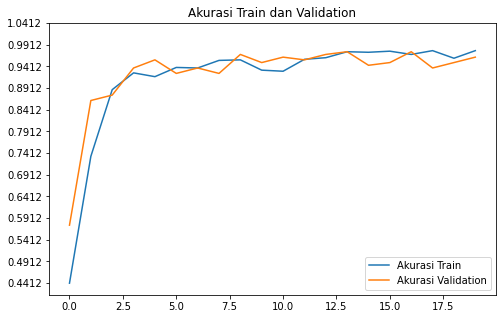

<Figure size 432x288 with 0 Axes>

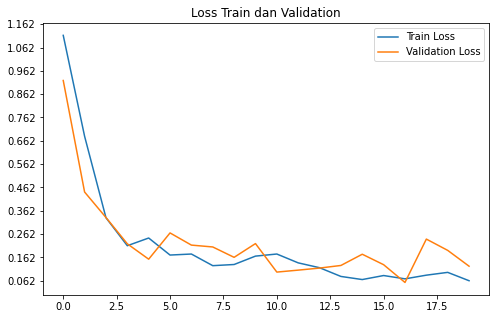

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = result.epoch

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, label='Akurasi Train')
plt.plot(epochs, val_acc, label='Akurasi Validation')
plt.title('Akurasi Train dan Validation')
plt.yticks(np.arange(min(acc), max(acc)+0.1, 0.05))
plt.legend()
plt.figure()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss Train dan Validation')
plt.yticks(np.arange(min(loss), max(loss)+0.1, 0.1))
plt.legend()
plt.show()

### **Testing Model**

Saving JNPDbgVUhQbrurMZ.png to JNPDbgVUhQbrurMZ (1).png

Kelas : Gunting



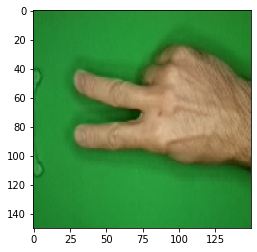

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    if classes[0, 0] == 1:
       print('\nKelas : Kertas\n')
    elif classes[0, 1] == 1:
       print('\nKelas : Batu\n')
    else:
       print('\nKelas : Gunting\n')